# <a href="#C1">Machine Learning / Un Oeil géométrique sur la Détection de Faux Billets

## Descriptif :
-  Mission de consulting au sein de l'Organisation nationale de lutte contre le faux-monnayage (ONCFM).

## Objectifs : 
- Mettre en place une modélisation qui serait capable d’identifier automatiquement les **<font color='green'>vrais </font>** des **<font color='red'>faux </font>** billets à partir simplement de certaines dimensions du billet et des éléments qui le composent.
    - Quels sont les traitements et analyses réalisés en amont ?
    - Les différentes pistes explorées pour la construction de l’algorithme ?
    - Le modèle final retenu.
    

Sommaire :
- [Importer les librairies](#Importer-les-librairies)
- [Importer les données](#Importer-les-données)    
- [Instancier un objet](#Instancier-un-objet)    
- [Features normalisées](#Features-normalisées)
- [Target](#Target)
- 1) [Régression logistique](#Régression-logistique)
        - a) [Train, test split](#Train,-test-split)
        - b) [Sélection de l'estimateur](#Sélection-de-l'estimateur)
        - c) [Entrainer le modèle sur les données](#Entrainer-le-modèle-sur-les-données)
        - d) [Evaluer le modèle](#Evaluer-le-modèle)
        - e) [Prédictions - régression logistique](#Prédictions---régression-logistique)
        - f) [Liste des Faux positif](#Liste-des-Faux-positif)
        - g) [Distribution des Faux positif](#Distribution-des-Faux-positif)
        - h) [Learning Curve](#Learning-Curve)
        - i) [Boundary decision plot (Regression logisitque)](#Boundary-decision-plot-(Regression-logisitque))    
- 2) [Support Vector Classifier (SVC)](#Support-Vector-Classifier-(SVC))
        - a) [Sélection de l'estimateur (SVC)](#Sélection-de-l'estimateur-(SVC))
        - b) [Entrainer le modèle de SVC](#Entrainer-le-modèle-de-SVC)
        - c) [Evaluer le modèle de SVC](#Evaluer-le-modèle-de-SVC)
        - d) [Prédictions (SVC)](#Prédictions-(SVC))
        - e) [Learning Curve (SVC)](#Learning-Curve-(SVC))
        - f) [Boundary decision plot (SVC)](#Boundary-decision-plot-(SVC))    
- 3) [K-means](#K-means)
        - a) [Appliquer le K-means](#Appliquer-le-K-means)
        - b) [Sélection de l'estimateur - K-means](#Sélection-de-l'estimateur---K-means)
        - c) [Entrainer le modèle - K-means](#Entrainer-le-modèle---K-means)
        - d) [Evaluer le modèle - K-means](#Evaluer-le-modèle---K-means)
        - e) [Prédictions - K-means](#Prédictions---K-means)
        - f) [Liste des Faux positif et Faux négatif](#Liste-des-Faux-positif-et-Faux-négatif)
        - g) [Distribution des Faux positif et Faux négatif](#Distribution-des-Faux-positif-et-Faux-négatif)
- 4) [Analyse en Composantes Principales (ACP)](#Analyse-en-Composantes-Principales-(ACP))
        - a) [Sélection de l'estimateur - ACP](#Sélection-de-l'estimateur---ACP)
        - b) [Entrainer le modèle - ACP](#Entrainer-le-modèle---ACP)
        - c) [Combien de composantes analyser ?](#Combien-de-composantes-analyser-?)
        - d) [Appliquer l'ACP](#Appliquer-l'ACP)
        - e) [Visualisation des centroids et des individus en 2D](#Visualisation-des-centroids-et-des-individus-en-2D)
        - f) [Visualisation des individus en 3D](#Visualisation-des-individus-en-3D)
        - g) [Plans factoriels](#Plans-factoriels)
- 5) [Test sur un autre échantillon](#Test-sur-un-autre-échantillon)
- 6) [Modèle final](#Modèle-final)
- 7) [Conclusion - Comparaison des 3 méthodes de classification](#Conclusion---Comparaison-des-3-méthodes-de-classification)


# Importer les librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Normalisation
from sklearn import preprocessing
# Regression, split des données entrainement, test
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
# Clustering
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
from sklearn.decomposition import PCA
# Matrice de confusion, Evaluation du modèle
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.express as px
import warnings

In [2]:
cleaned_data = pd.read_csv("cleaned_data.csv")
cleaned_data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# Importer les données

Nous devons séparer le dataset source "data" avec les données d'entraienement X et les variables que l'on cherche à prédire (target).

# Instancier un objet

In [3]:
scaler = preprocessing.MinMaxScaler()

In [4]:
# On instancie un objet / Ajuster le scaler aux données filtrées
scaled_data = scaler.fit(cleaned_data.drop(["is_genuine"], axis=1))
scaled_data

MinMaxScaler()

La colonne "is_genuine" est exclue de la transformation car on ne normalise pas la variable que l'on cherche à prédire (target).

# Features normalisées

In [5]:
# Transformer les données entre 0 et 1
X = scaled_data.transform(cleaned_data.drop(["is_genuine"], axis=1))
# Conversion de l'array Numpy en DataFrame
X = pd.DataFrame(X)
# Ajout des noms des variables
X.columns = ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]
X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747
1,0.213198,0.126437,0.394366,0.201531,0.439024,0.727273
2,0.837563,0.770115,0.319249,0.362245,0.408537,0.741414
3,0.162437,0.442529,0.525822,0.163265,0.451220,0.812121
4,0.350254,0.655172,0.300469,0.270408,0.737805,0.616162


# Target

In [6]:
y = cleaned_data["is_genuine"]
# Conversion de l'array Numpy en DataFrame
y = pd.DataFrame(y)
y.head()

,is_genuine
0,True
1,True
2,True
3,True
4,True


# Régression logistique
## Train, test split

In [7]:
# Splitting the dataframe into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
# Structure
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape} ")
print(f"Nous avons X_train de forme {X_test.shape} et y_train de forme {y_test.shape} ")

Nous avons X_train de forme (1200, 6) et y_train de forme (1200, 1) 
Nous avons X_train de forme (300, 6) et y_train de forme (300, 1) 


## Sélection de l'estimateur

In [8]:
model_rlog = LogisticRegression(solver="liblinear")

## Entrainer le modèle sur les données

In [9]:
model_rlog = LogisticRegression()
model_rlog.fit(X_train, np.ravel(y_train)) # np.ravel sert à passer une matrice de dimension 1 pour y_train

LogisticRegression()

## Evaluer le modèle
### Score

In [10]:
score_rlog = model_rlog.score(X_train, y_train)
print("Score :", str(score_rlog.round(4)))
print("Marge d'erreur:", str(((1-score_rlog)*100).round(2)), "%")

Score : 0.9883
Marge d'erreur: 1.17 %


### Matrice de confusion

In [11]:
#                  Predicted Negative   Predicted Positive
# Vrai valeurs         TN                   FP
# Vrai valeurs         FN                   TP
mat = confusion_matrix(y_test, model_rlog.predict(X_test))
# Conversion de l'array Numpy en DataFrame
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"real_{i}" for i in mat.index]
mat

,pred_0,pred_1
real_0,106,4
real_1,0,190


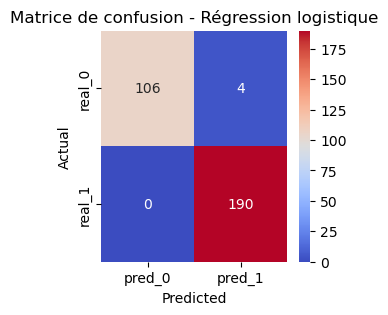

In [12]:
# Create a heatmap
plt.figure(figsize=(3, 3))  # Adjust the figure size if needed
sns.heatmap(mat, annot=True, fmt="d", cmap="coolwarm")
# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matrice de confusion - Régression logistique")
# Show the plot
plt.show()

In [13]:
# Equation du modèle de Régression Logistique
coefficients = model_rlog.coef_[0]
intercept = model_rlog.intercept_[0]
equation = "Y = "
for i, coef in enumerate(coefficients):
    equation += f"({coef:.4f} * X{i+1}) + "
equation += f"{intercept:.4f}"
print("Equation of the logistic regression model:")
print(equation)

Equation of the logistic regression model:
Y = (0.8519 * X1) + (-1.9840 * X2) + (-2.9540 * X3) + (-6.7096 * X4) + (-4.5269 * X5) + (8.3834 * X6) + 3.0650


## Prédictions - régression logistique

In [14]:
# Prédiction de l'échantillon test
y_pred = model_rlog.predict(X_test)
# Conversion de l'array Numpy en DataFrame
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,False
1,False
2,True


In [15]:
# Création du dataframe avec les valeurs prédites
X_test_pred = X_test.copy()
# Ajout de la colonne is_genuine
X_test_pred["is_genuine"] = cleaned_data.loc[cleaned_data.index.isin(X_test.index), "is_genuine"]
# Ajout des prédictions faites par la régression logistique
X_test_pred["resultat_reg_log"] = y_pred.values
X_test_pred.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,resultat_reg_log
1116,0.619289,0.436782,0.610329,0.512755,0.701220,0.359596,False,False
1368,0.309645,0.678161,0.732394,0.681122,0.591463,0.567677,False,False
422,0.248731,0.224138,0.380282,0.270408,0.420732,0.660606,True,True
413,0.639594,0.298851,0.319249,0.286967,0.542683,0.698990,True,True
451,0.573604,0.373563,0.338028,0.278061,0.310976,0.715152,True,True


In [16]:
VP = X_test_pred[(X_test_pred["is_genuine"] == True) & (X_test_pred["resultat_reg_log"] == True)]
VN = X_test_pred[(X_test_pred["is_genuine"] == False) & (X_test_pred["resultat_reg_log"] == False)]
FP = X_test_pred[(X_test_pred["is_genuine"] == False) & (X_test_pred["resultat_reg_log"] == True)]
FN = X_test_pred[(X_test_pred["is_genuine"] == True) & (X_test_pred["resultat_reg_log"] == False)]

In [17]:
X_test_pred
# Ajout d'une colonne résultat
X_test_pred["resultat_reg_log_type"] = np.where(X_test_pred.index.isin(VP.index), "VP",
                                        np.where(X_test_pred.index.isin(VN.index), "VN",
                                                 np.where(X_test_pred.index.isin(FP.index), "FP",
                                                          np.where(X_test_pred.index.isin(FN.index), "FN", ""))))

X_test_pred.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,resultat_reg_log,resultat_reg_log_type
1116,0.619289,0.436782,0.610329,0.512755,0.701220,0.359596,False,False,VN
1368,0.309645,0.678161,0.732394,0.681122,0.591463,0.567677,False,False,VN
422,0.248731,0.224138,0.380282,0.270408,0.420732,0.660606,True,True,VP
413,0.639594,0.298851,0.319249,0.286967,0.542683,0.698990,True,True,VP
451,0.573604,0.373563,0.338028,0.278061,0.310976,0.715152,True,True,VP


## <font color='orange'>Liste des Faux positif

In [18]:
X_test_pred.loc[X_test_pred.resultat_reg_log_type == "FP"]

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,resultat_reg_log,resultat_reg_log_type
1190,0.208122,0.614943,0.638498,0.400510,0.762195,0.751515,False,True,FP
1281,0.294416,0.798851,0.384977,0.487245,0.542683,0.616162,False,True,FP
1084,0.456853,0.649425,0.525822,0.377551,0.530488,0.533333,False,True,FP
1073,0.553299,0.304598,0.469484,0.329082,0.579268,0.537374,False,True,FP


## <font color='orange'>Distribution des Faux positif


In [19]:
warnings.filterwarnings("ignore")
# Création d'un dataframe avec les résultats sur les données sources de l'échantillon de test
cleaned_data_resultat = cleaned_data.loc[cleaned_data.index.isin(X_test_pred.index)]
cleaned_data_resultat["resultat_reg_log_type"] = X_test_pred["resultat_reg_log_type"].values
display(cleaned_data_resultat.head())

# Création de dataframe par ordre de grandeur
data_fusion = pd.melt(cleaned_data_resultat, id_vars="resultat_reg_log_type", 
                      var_name='Variables', value_name='Valeurs')

data_fusion_diag = data_fusion.loc[data_fusion["Variables"].isin(["diagonal"])]
data_fusion_length = data_fusion.loc[data_fusion["Variables"].isin(["length"])]
data_fusion_big = data_fusion.loc[data_fusion["Variables"].isin(["height_left", "height_right"])]
data_fusion_small = data_fusion.loc[data_fusion["Variables"].isin(["margin_low", "margin_up"])]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,resultat_reg_log_type
15,True,171.73,103.92,103.74,4.43,2.78,112.98,VN
23,True,172.56,103.85,103.62,3.32,3.13,113.37,VN
29,True,171.58,103.59,103.79,4.10,2.92,113.56,VP
30,True,171.71,103.95,103.97,4.00,2.83,113.55,VP
32,True,171.99,103.79,103.90,4.62,2.90,112.92,VP


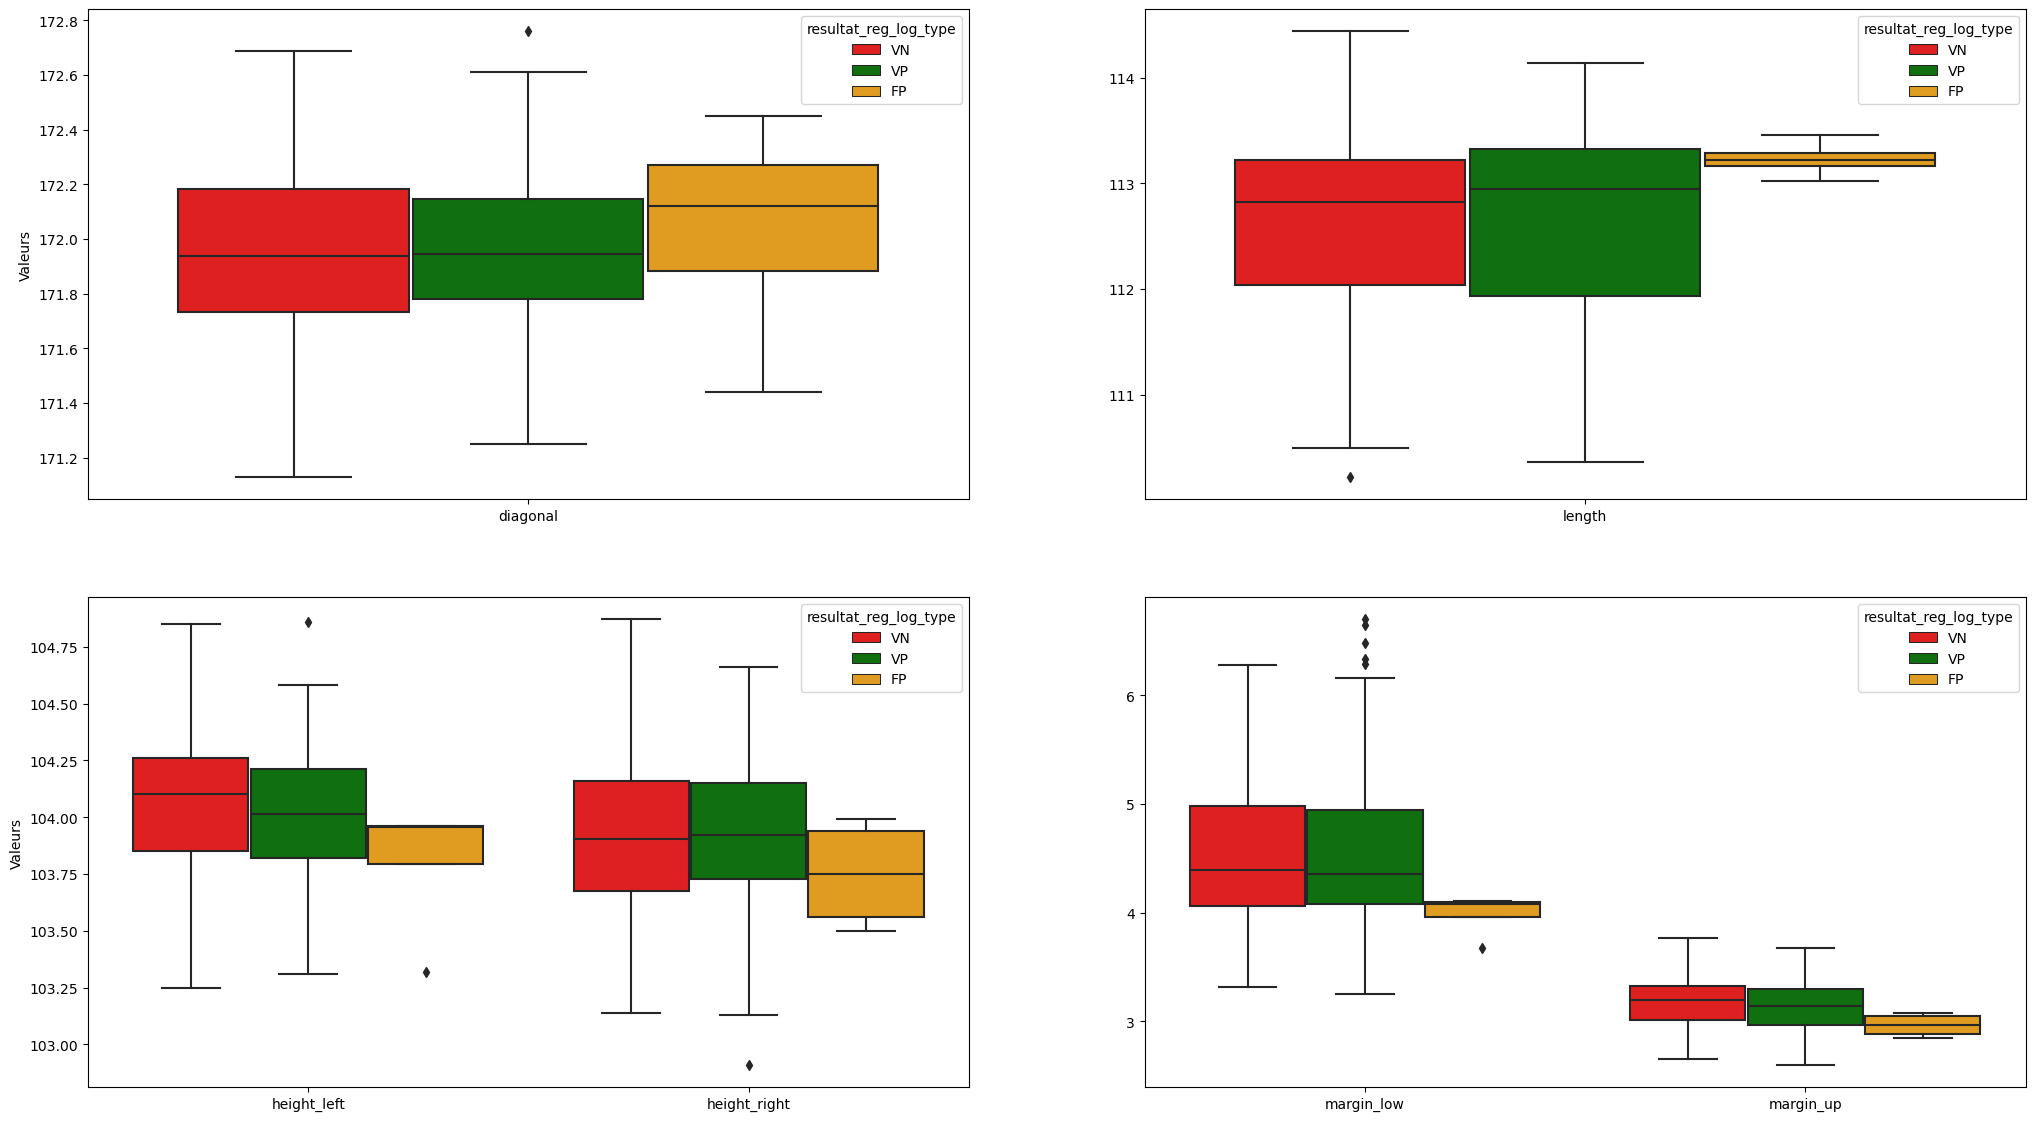

,diagonal,length,height_left,height_right,margin_low,margin_up
resultat_reg_log_type,,,,,,
FP,172.120,113.220,103.955,103.750,4.080,2.965
VN,171.940,112.825,104.100,103.905,4.395,3.200
VP,171.945,112.945,104.015,103.920,4.360,3.140


In [20]:
custom_palette = {"VP": "green", "VN": "red", "FN":"blue", "FP":"orange"}

# Créér les Boxplots
fig, axs = plt.subplots(2, 2, figsize=(25, 14))
# 1er boxplot
sns.boxplot(x="Variables", y="Valeurs", hue="resultat_reg_log_type", 
            data=data_fusion_diag, ax=axs[0,0], palette=custom_palette)
axs[0,0].set_xlabel("")
axs[0,0].set_ylabel("Valeurs")
# 2ème boxplot
sns.boxplot(x="Variables", y="Valeurs", hue="resultat_reg_log_type", 
            data=data_fusion_length, ax=axs[0,1], palette=custom_palette)
axs[0,1].set_xlabel("")
axs[0,1].set_ylabel("")
# 3ème boxplot
sns.boxplot(x="Variables", y="Valeurs", hue="resultat_reg_log_type", 
            data=data_fusion_big, ax=axs[1,0], palette=custom_palette)
axs[1,0].set_xlabel("")
axs[1,0].set_ylabel("Valeurs")
# 4ème boxplot
sns.boxplot(x="Variables", y="Valeurs", hue="resultat_reg_log_type", 
            data=data_fusion_small, ax=axs[1,1], palette=custom_palette)
axs[1,1].set_xlabel("")
axs[1,1].set_ylabel("")
plt.show()
# Afficher la médiane par type de Résultats
cleaned_data_resultat.groupby("resultat_reg_log_type")[["diagonal", "length", "height_left", 
                                              "height_right","margin_low", "margin_up"]].median()

On constate que :
- les faux positifs 
    - affichent les médianes les plus basses comparés au **<font color='green'>vrais positif</font>** et **<font color='red'>vrais négatif</font>**.
    - les variables diagonal et length possèdent des médianes supérieures aux 2 autres type de billets.
    
Il est donc difficile au vue des résultats obtenus de conclure avec certitude quelles variables sont les plus influentes pour expliquer pourquoi le modèle s'est trompé sur 4 billets. Il faut tout de même noter que l'évaluation du modèle à réveler un score de précision très éléve de 0.9891 (99%).

## Learning Curve

Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo&t=718s

Comment interpréter ce code : np.linspace(0.1,1.0,10)?
- 0.1 correspond au fait qu'on effectue des learning curbe de 10% jusqu'à 100% en prenant 10 lots.

Echantillons N: [ 60 120 180 240 300 360 420 480 540 600]


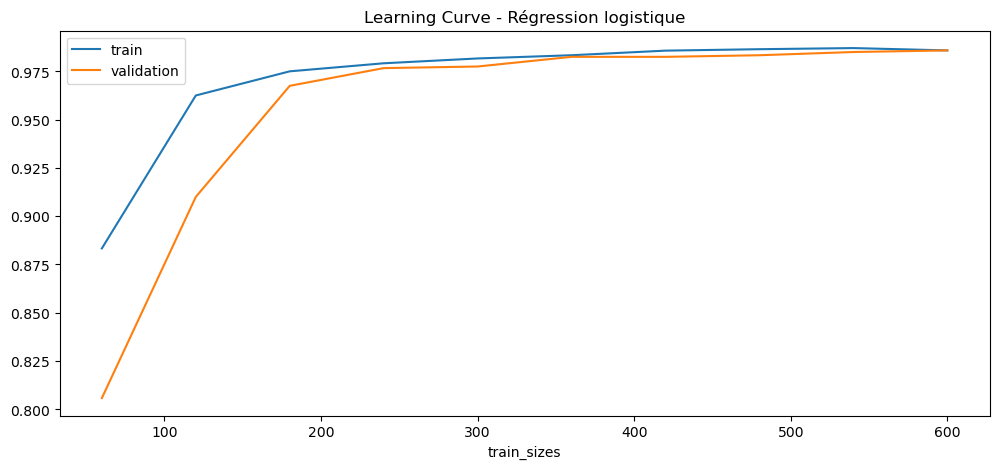

In [21]:
plt.figure(figsize=(12,5))

N, train_score, val_score = learning_curve(model_rlog, X_train, y_train,
                                          train_sizes = np.linspace(0.1,1.0,10), cv=2)
print("Echantillons N: " + str(N))
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.title("Learning Curve - Régression logistique")
plt.xlabel("train_sizes")
plt.legend()
plt.show()

Les performances de notre modèle de Régression logistique commence à stagner à partir de 250 billets. Cela nous indique qu'il est peu probable que les performances du modèe s'améliore au-delà de 250 billets.

# Boundary decision plot (Regression logisitque)

Source : https://stackoverflow.com/questions/61225052/svm-plot-decision-surface-when-working-with-more-than-2-features

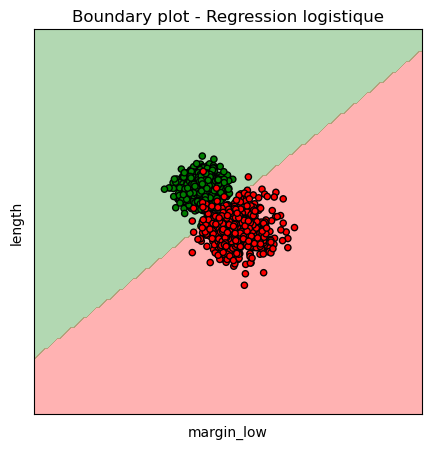

In [22]:
# Transformer les features X en array Numpy
X_boundary = np.array(X)
# Sélectionner la 3ème variable (margin_low) et la dernière (length)
X_boundary = X_boundary[:, [3, -1]]  
y = y

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, model_rlog, xx, yy, **params):
    Z = model_rlog.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
# Afficher les couleurs des contours en fonction
    ax.contourf(xx, yy, Z, levels=1, colors=('red', 'green'), alpha=0.3)

clf = model_rlog.fit(X_boundary, y)

fig, ax = plt.subplots(figsize=(5,5))
title = 'Boundary plot - Regression logistique'
X0, X1 = X_boundary[:, 0], X_boundary[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Conversion des couleurs
colors = y['is_genuine'].map({True: 'green', False: 'red'})
# Afficher le graphique
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=colors, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('length')
ax.set_xlabel('margin_low')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## --- Attention --- 
Il faut ré-entrainer le modèle de régression logistique sur 6 features au lieu des 2 pour le modèle final qui sera fonction de 6 features.

In [23]:
# Nous devons ré-entrainer le modèle sur 6 features
model_rlog = clf.fit(X, y)

# Support Vector Classifier (SVC)
## Sélection de l'estimateur (SVC)

In [24]:
from sklearn.svm import LinearSVC
model_SVC = LinearSVC()

## Entrainer le modèle de SVC

In [25]:
model_SVC.fit(X_train, y_train)

LinearSVC()

## Evaluer le modèle de SVC

### Score de SVC

In [26]:
score_SVC = model_SVC.score(X_train, y_train)
print("Score :", str(score_SVC.round(4)))
print("Marge d'erreur:", str(((1-score_SVC)*100).round(2)), "%")

Score : 0.9925
Marge d'erreur: 0.75 %


### Matrice de confusion SVC

In [27]:
#                  Predicted Negative   Predicted Positive
# Vrai valeurs         TN                   FP
# Vrai valeurs         FN                   TP
mat_SVC = confusion_matrix(y_test, model_SVC.predict(X_test))
# Conversion de l'array Numpy en DataFrame
mat_SVC = pd.DataFrame(mat_SVC)
mat_SVC.columns = [f"pred_{i}" for i in mat_SVC.columns]
mat_SVC.index = [f"real_{i}" for i in mat_SVC.index]
mat_SVC

,pred_0,pred_1
real_0,108,2
real_1,0,190


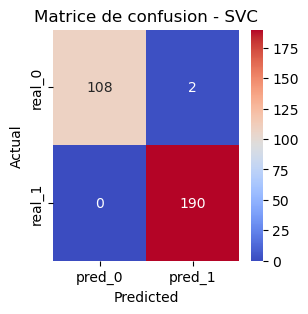

In [28]:
# Create a heatmap
plt.figure(figsize=(3, 3))  # Adjust the figure size if needed
sns.heatmap(mat_SVC, annot=True, fmt="d", cmap="coolwarm")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matrice de confusion - SVC")

# Show the plot
plt.show()

## Prédictions (SVC)

In [29]:
# Prédiction de l'échantillon test
y_pred_SVC = model_SVC.predict(X_test)
# Conversion de l'array Numpy en DataFrame
y_pred_SVC = pd.DataFrame(y_pred_SVC)
y_pred_SVC.head(5)

,0
0,False
1,False
2,True
3,True
4,True


## Learning Curve (SVC)

[ 60 120 180 240 300 360 420 480 540 600]


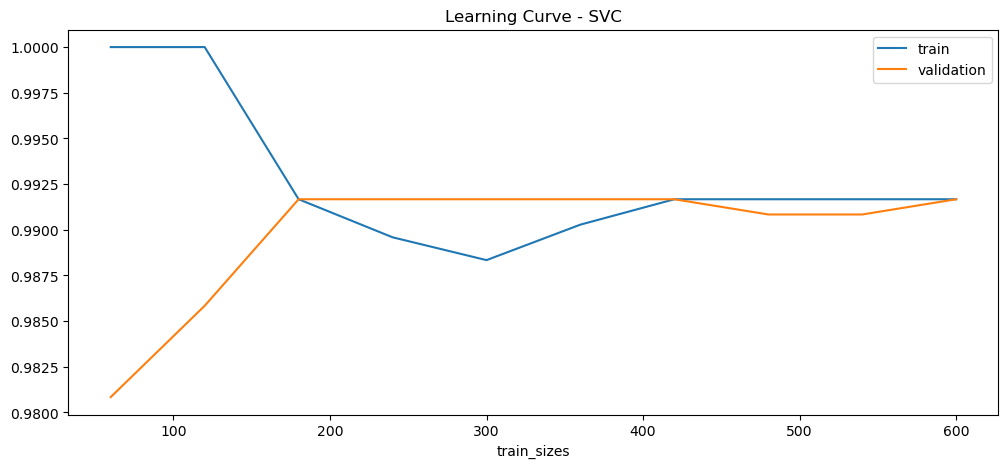

In [30]:
plt.figure(figsize=(12,5))
# Learning curve
N, train_score, val_score = learning_curve(model_SVC, X_train, y_train,
                                          train_sizes = np.linspace(0.1,1.0,10), cv=2)
print(N)
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.title("Learning Curve - SVC")
plt.xlabel("train_sizes")
plt.legend()
plt.show()

Les performances de notre modèle de Support Machine Classifier commence à stagner à partir de 450 billets. Cela nous indique qu'il est peu probable que les performances du modèe s'améliore au-delà de 450 billets.

## Boundary decision plot (SVC)

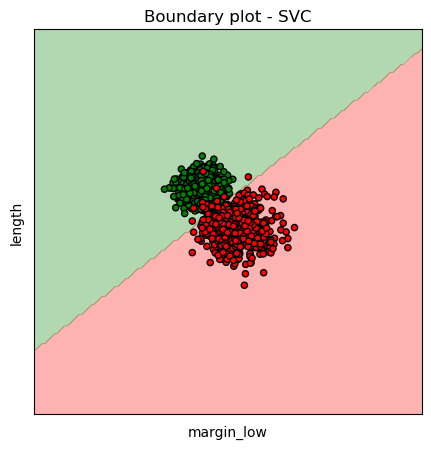

In [31]:
# Transformer les features X en array Numpy
X_boundary = np.array(X)
# Sélectionner la 3ème variable (margin_low) et la dernière (length)
X_boundary = X_boundary[:, [3, -1]]  
y = y

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, model_rlog, xx, yy, **params):
    Z = model_rlog.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
# Afficher les couleurs des contours en fonction
    ax.contourf(xx, yy, Z, levels=1, colors=('red', 'green'), alpha=0.3)


clf = model_SVC.fit(X_boundary, y)

fig, ax = plt.subplots(figsize=(5,5))
title = 'Boundary plot - SVC'
X0, X1 = X_boundary[:, 0], X_boundary[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Conversion des couleurs
colors = y['is_genuine'].map({True: 'green', False: 'red'})
# Afficher le graphique
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=colors, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('length')
ax.set_xlabel('margin_low')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## --- Attention --- 
Il faut ré-entrainer le modèle sur 6 features au lieu des 2 pour le modèle final qui sera fonction de 6 features.

In [32]:
# Nous devons ré-entrainer le modèle sur 6 features
clf = model_SVC.fit(X, y)

# K-means

-- ATTENTION --: 

Le K-means est un algorithme de clustering non-supervisé, nous allons le tester pour ce projet tout en gardant à l'esprit que les résultats seront à critiquer.


Nous cherchons à prédire is_genuine, par conséquent nous allons exclure la colonne binaire is_genuine pour garder que les features (X).

In [33]:
data_KM = X.copy()

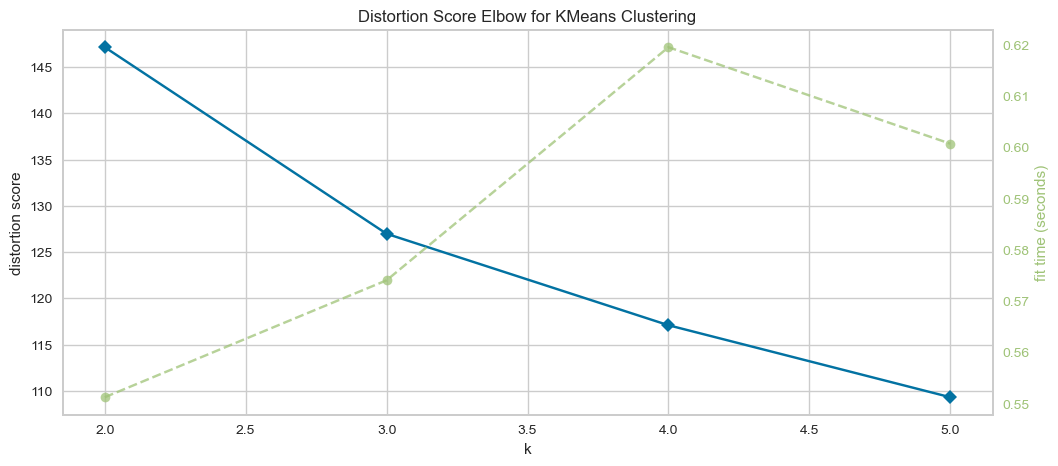

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=5, random_state=42), k=(2, 6))

In [34]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(12,5))
# Use the quick method and immediately show the figure
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=42), X, k=(2,6))

# from yellowbrick.cluster import silhouette_visualizer
# # Use the quick method and immediately show the figure
# silhouette_visualizer(KMeans(5, random_state=42), X, colors='yellowbrick')

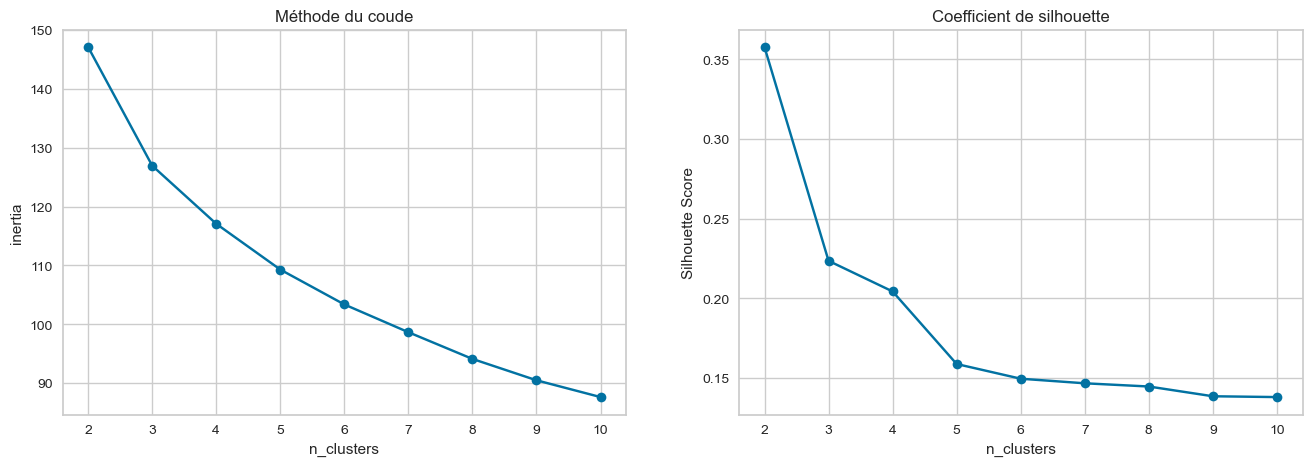

In [35]:
warnings.filterwarnings("ignore")
# On défini ensuite la liste du nombre de clusters que l'on veut tester:
k_list = range(2, 11)
# On défini d'abord une liste vide pour stocker nos inerties:
inertia = []
# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :
for i in k_list:
    kmeans = KMeans(n_clusters=i, 
                    init="k-means++", 
                    random_state = 42, 
                    n_init=15).fit(data_KM)
    inertia.append(kmeans.inertia_)

# display(inertia)

# Graphique avec 2 plots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Afficher la courbe du coude
axs[0].plot(range(2, 11), inertia, marker="o")
axs[0].set_title("Méthode du coude")
axs[0].set_xlabel("n_clusters")
axs[0].set_ylabel("inertia")

# Your code for calculating and plotting the silhouette scores
k_list2 = range(2, 11)
silhouettes = []
for i in k_list2:
    kmeans2 = cluster.KMeans(n_clusters = i, n_init=15, 
                             random_state = 42,  
                             init="k-means++"
                            )
    kmeans2.fit(data_KM)
    silh = metrics.silhouette_score(data_KM, kmeans2.labels_)
    silhouettes.append(silh)

# Afficher le graphique du coefficient de silhouette
axs[1].plot(range(2, 11), silhouettes, marker="o")
axs[1].set_title("Coefficient de silhouette")
axs[1].set_xlabel("n_clusters")
axs[1].set_ylabel("Silhouette Score")
plt.show()

Nous avons 2 clusters correspondant aux billets VRAI, FAUX. Il est donc inutile de chercher le nombre de clusters à l'aide de la méthode du coude ou le coefficient de silhouette.

# Appliquer le K-means

## Sélection de l'estimateur - K-means

In [36]:
# On instancie
kmeans = KMeans(n_clusters=2, n_init=20, random_state = 42, init="k-means++")

## Entrainer le modèle - K-means

In [37]:
# On entraine le modèle, on l'ajuste aux données
kmeans.fit(data_KM)
# Affecter les cluster à la varialbe labels
labels = kmeans.labels_
# Affecter les centroides à la varialbe centroids
centroids = kmeans.cluster_centers_
# Ajouter les labels à notre dataframe data_KM
data_KM["cluster_KM"] = labels
data_KM.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_KM
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747,0
1,0.213198,0.126437,0.394366,0.201531,0.439024,0.727273,1
2,0.837563,0.770115,0.319249,0.362245,0.408537,0.741414,1
3,0.162437,0.442529,0.525822,0.163265,0.451220,0.812121,1
4,0.350254,0.655172,0.300469,0.270408,0.737805,0.616162,1


In [38]:
data_KM["cluster_KM"].value_counts()

1    1005
0     495
Name: cluster_KM, dtype: int64

# Evaluer le modèle - K-means

## Le score de précision
Il représente le ratio des prévisions CORRECTES sur le nombre total de prédictions réalisées.

Score = (TP + TN) / (TP + TN + FP + FN)
- TP : **<font color='green'>Vrais Positif</font>**
- TN : **<font color='red'>Vrais Négatif</font>**
- FP : **<font color='orange'>Faux positif</font>**
- FN : **<font color='blue'>Faux négatif</font>**

In [39]:
real_target = y
y_pred = data_KM["cluster_KM"]

score = accuracy_score(real_target, y_pred)
print("Score:", score.round(4))
print("Marge d'erreur:", str(((1-score)*100).round(2)), "%")

Score: 0.9873
Marge d'erreur: 1.27 %


Le score obtenu est presque parfait ce qui indique que le modèle obtenu est correct. Cependant, même si la marge d'erreur est de 1.27%, nous devons utiliser une approche de classification supervisée comme le Régression logistique.

## Matrice de confusion

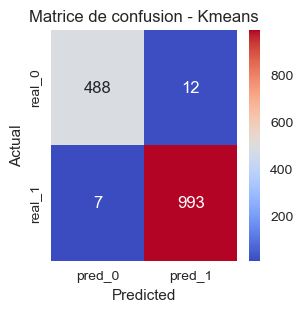

In [40]:
#                  Predicted Negative   Predicted Positive
# Actual Negative         TN                   FP
# Actual Positive         FN                   TP

mat_KM = confusion_matrix(real_target, y_pred)
# Conversion de l'array Numpy en DataFrame
mat_KM = pd.DataFrame(mat_KM)
mat_KM.columns = [f"pred_{i}" for i in mat_KM.columns]
mat_KM.index = [f"real_{i}" for i in mat_KM.index]
# display(mat_KM)

# Create a heatmap
plt.figure(figsize=(3, 3))  # Adjust the figure size if needed
sns.heatmap(mat_KM, annot=True, fmt="d", cmap="coolwarm")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matrice de confusion - Kmeans")

# Show the plot
plt.show()

In [41]:
data_KM["is_genuine"] = y
data_KM.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_KM,is_genuine
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747,0,True
1,0.213198,0.126437,0.394366,0.201531,0.439024,0.727273,1,True
2,0.837563,0.770115,0.319249,0.362245,0.408537,0.741414,1,True
3,0.162437,0.442529,0.525822,0.163265,0.451220,0.812121,1,True
4,0.350254,0.655172,0.300469,0.270408,0.737805,0.616162,1,True


In [42]:
VP_km = data_KM[(data_KM["is_genuine"] == True) & (data_KM["cluster_KM"] == 1)]
VN_km = data_KM[(data_KM["is_genuine"] == False) & (data_KM["cluster_KM"] == 0)]
FP_km = data_KM[(data_KM["is_genuine"] == False) & (data_KM["cluster_KM"] == 1)]
FN_km = data_KM[(data_KM["is_genuine"] == True) & (data_KM["cluster_KM"] == 0)]

In [43]:
# Ajout d'une colonne résultat
data_KM["resultat_KM_type"] = np.where(data_KM.index.isin(VP_km.index), "VP",
                                        np.where(data_KM.index.isin(VN_km.index), "VN",
                                                 np.where(data_KM.index.isin(FP_km.index), "FP",
                                                          np.where(data_KM.index.isin(FN_km.index), "FN", ""))))

data_KM.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_KM,is_genuine,resultat_KM_type
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747,0,True,FN
1,0.213198,0.126437,0.394366,0.201531,0.439024,0.727273,1,True,VP
2,0.837563,0.770115,0.319249,0.362245,0.408537,0.741414,1,True,VP
3,0.162437,0.442529,0.525822,0.163265,0.451220,0.812121,1,True,VP
4,0.350254,0.655172,0.300469,0.270408,0.737805,0.616162,1,True,VP


## Liste des **<font color='orange'>Faux positif</font> et **<font color='blue'>Faux négatif</font>****

In [44]:
data_KM.loc[(data_KM["resultat_KM_type"] == "FP") | (data_KM["resultat_KM_type"] == "FN")]


,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_KM,is_genuine,resultat_KM_type
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747,0,True,FN
341,0.436548,0.614943,0.652582,0.456633,0.676829,0.749495,0,True,FN
626,0.477157,0.747126,0.591549,0.431122,0.573171,0.654545,0,True,FN
669,0.558376,0.689655,0.647887,0.420918,0.457317,0.602020,0,True,FN
724,0.568528,0.741379,0.582160,0.390306,0.560976,0.646465,0,True,FN
728,0.456853,0.557471,0.629108,0.280612,0.658537,0.458586,0,True,FN
743,0.639594,0.827586,0.633803,0.352041,0.646341,0.705051,0,True,FN
1025,0.573604,0.609195,0.615023,0.224490,0.676829,0.595960,1,False,FP
1073,0.553299,0.304598,0.469484,0.329082,0.579268,0.537374,1,False,FP
1081,0.395939,0.436782,0.399061,0.461735,0.664634,0.593939,1,False,FP


## Distribution des **<font color='orange'>Faux positif</font> et **<font color='blue'>Faux négatif</font>****

In [45]:
# Création d'un dataframe avec les résultats sur les données sources de l'échantillon de test
# data_KM_not_scaled = cleaned_data.loc[cleaned_data.index.isin(X_test_pred.index)]
data_KM_not_scaled = cleaned_data.copy()
data_KM_not_scaled["resultat_KM_type"] = data_KM["resultat_KM_type"].values
display(data_KM_not_scaled.head())

# Création de dataframe par ordre de grandeur
data_fusion_km = pd.melt(data_KM_not_scaled, id_vars="resultat_KM_type", var_name='Variables', value_name='Valeurs')
data_fusion_diag_km = data_fusion_km.loc[data_fusion_km["Variables"].isin(["diagonal"])]
data_fusion_length_km = data_fusion_km.loc[data_fusion_km["Variables"].isin(["length"])]
data_fusion_big_km = data_fusion_km.loc[data_fusion_km["Variables"].isin(["height_left", "height_right"])]
data_fusion_small_km = data_fusion_km.loc[data_fusion_km["Variables"].isin(["margin_low", "margin_up"])]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,resultat_KM_type
0,True,171.81,104.86,104.95,4.52,2.89,112.83,FN
1,True,171.46,103.36,103.66,3.77,2.99,113.09,VP
2,True,172.69,104.48,103.50,4.40,2.94,113.16,VP
3,True,171.36,103.91,103.94,3.62,3.01,113.51,VP
4,True,171.73,104.28,103.46,4.04,3.48,112.54,VP


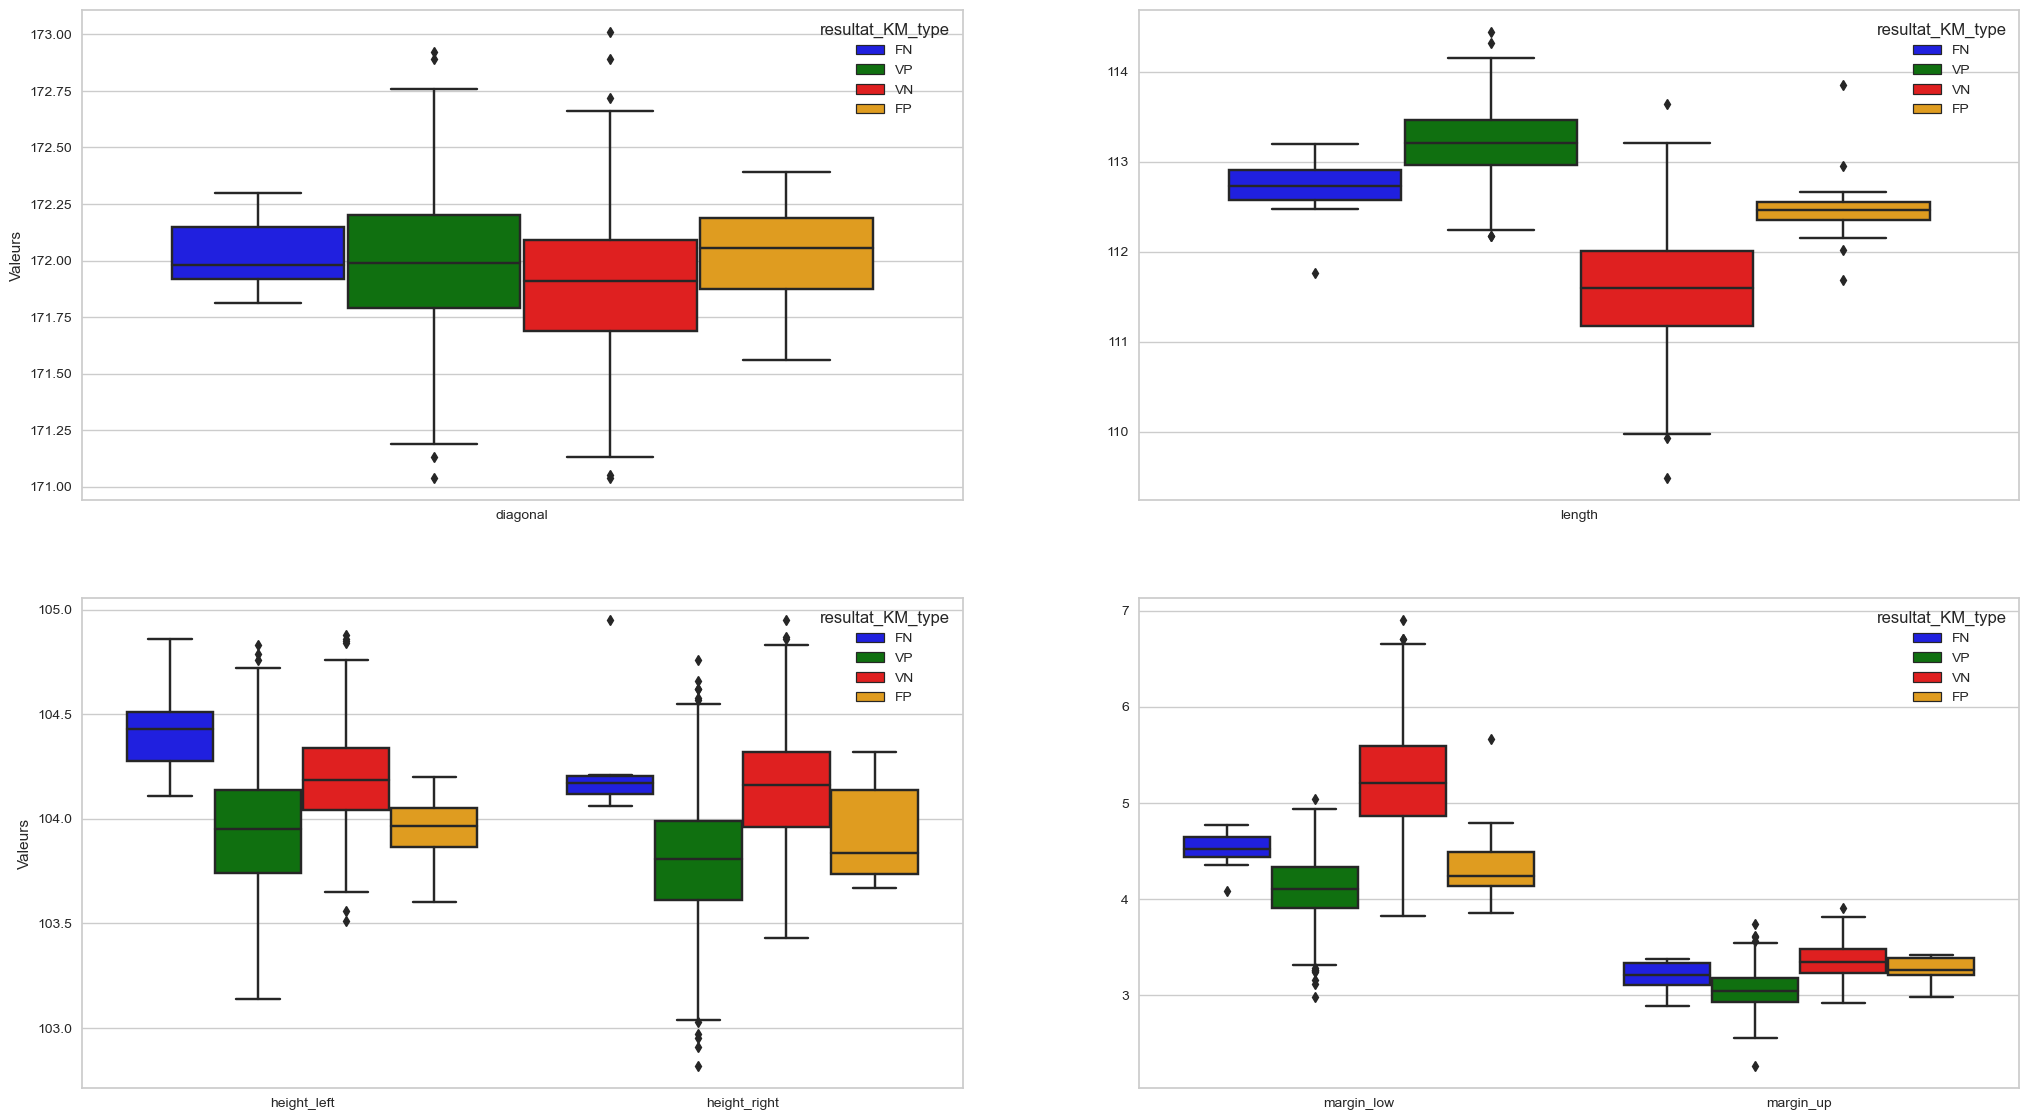

,diagonal,length,height_left,height_right,margin_low,margin_up
resultat_KM_type,,,,,,
FN,171.980,112.73,104.430,104.170,4.520,3.21
FP,172.055,112.46,103.965,103.835,4.245,3.26
VN,171.910,111.60,104.185,104.160,5.205,3.35
VP,171.990,113.21,103.950,103.810,4.110,3.05


In [46]:
# Créér les Boxplots
fig, axs = plt.subplots(2, 2, figsize=(25, 14))
color = {"VP": "green", "VN": "red", "FN":"blue", "FP":"orange"}
# 1er boxplot
sns.boxplot(x="Variables", y="Valeurs", hue="resultat_KM_type", data=data_fusion_diag_km, ax=axs[0,0], palette=color)
axs[0,0].set_xlabel("")
axs[0,0].set_ylabel("Valeurs")
# 2ème boxplot
sns.boxplot(x="Variables", y="Valeurs", hue="resultat_KM_type", data=data_fusion_length_km, ax=axs[0,1], palette=color)
axs[0,1].set_xlabel("")
axs[0,1].set_ylabel("")
# 3ème boxplot
sns.boxplot(x="Variables", y="Valeurs", hue="resultat_KM_type", data=data_fusion_big_km, ax=axs[1,0], palette=color)
axs[1,0].set_xlabel("")
axs[1,0].set_ylabel("Valeurs")
# 4ème boxplot
sns.boxplot(x="Variables", y="Valeurs", hue="resultat_KM_type", data=data_fusion_small_km, ax=axs[1,1], palette=color)
axs[1,1].set_xlabel("")
axs[1,1].set_ylabel("")
plt.show()
# Afficher la médiane par type de Résultats
data_KM_not_scaled.groupby("resultat_KM_type")[["diagonal", "length", "height_left", 
                                              "height_right","margin_low", "margin_up"]].median()

Nous avons 2 paires à considérer :
- les **<font color='green'>Vrais Positif</font>** (VP) et les **<font color='blue'>Faux Négatif</font>** (FN)
- les **<font color='red'>Vrais Négatif</font>** (VN) et les **<font color='orange'>Faux Positif</font>** (FP)

Lorsque les médianes des paires (VP-FN), (VN-FP) sont similaires, on peut conclure que la dite variable n'est à priori pas la cause de l'erreur de classification. Par conséquent, la variable length et margin_up ne sont pas concernées car les médianes des paires sont alignées.
En outre, les variables restantes donne une première explication sur l'erreur de classification. Prenons par exemple, la variable diagonal, la médiane des faux positif (FP) est la plus élevée alors que celle des vrai négatif (VN) est la plus basse. Autrement dit, les **<font color='orange'>Faux Positif</font>** qui sont donc des **<font color='red'>Faux billets</font>** ont une médiane supérieure au **<font color='green'>Vrais billets</font>** ce qui peut expliquer que le modèle ait considérer ces **<font color='red'>Faux billets</font>** comme étant des **<font color='green'>Vrais billets</font>**.

    
Il est donc difficile au vue des résultats obtenus de conclure avec certitude quelles variables sont les plus influentes pour expliquer pourquoi le modèle s'est trompé sur 19 billets. Il faut tout de même noter que l'évaluation du modèle à réveler un score de précision très éléve de 0.987 (98.7%).

# Analyse en Composantes Principales (ACP)

Le nombre maximal de composantes d'une ACP est le minimum entre p et n-1 (ici n = 1500 et p = 6). 
- Ainsi, le nombre maximal de composantes pour cette ACP est de 6.
- Pour faire l'ACP, il faut instancier puis entrainer nos données sur la base du nombre de variables (p).

On exclut la variable is_genuine car l'ACP est une technique de réduction de dimensionalité non-supervisée. L'objectif étant de chercher une tendance, un modèle qui unit les features (X).

In [47]:
data_ACP = X.copy()
data_ACP.columns=[0,1,2,3,4,5]
data_ACP.head()

,0,1,2,3,4,5
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747
1,0.213198,0.126437,0.394366,0.201531,0.439024,0.727273
2,0.837563,0.770115,0.319249,0.362245,0.408537,0.741414
3,0.162437,0.442529,0.525822,0.163265,0.451220,0.812121
4,0.350254,0.655172,0.300469,0.270408,0.737805,0.616162


## Sélection de l'estimateur - ACP

In [48]:
# Choix du nombre de composantes à calculer
pca = PCA(n_components=6)

## Entrainer le modèle - ACP

In [49]:
pca.fit(data_ACP)

PCA(n_components=6)

## **Combien de composantes analyser ?**

En ACP, on projette les données sur les axes principaux d’inertie, eux-mêmes ordonnés selon l’inertie du nuage projeté : de la plus grande à la plus petite. Quand on additionne les inerties associées à tous les axes, on obtient l’inertie totale du nuage des individus. 
- On peut donc afficher le Diagramme relatif aux **éboulis des valeurs propres** qui décrit le pourcentage d’inertie totale associé à chaque axe.

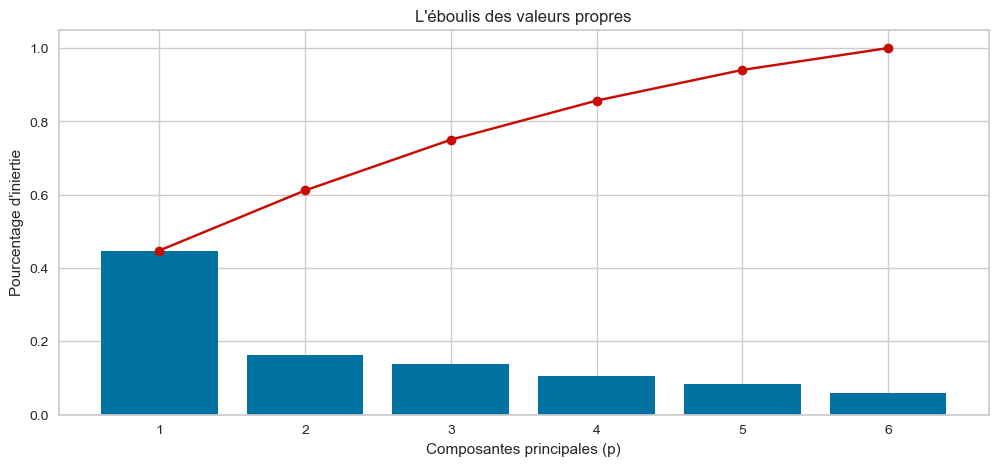

Inerties cumulées : [0.45 0.61 0.75 0.86 0.94 1.  ]


In [50]:
# Calcul de la variance cumulée : 
variance_cumulee = pca.explained_variance_ratio_.cumsum()

# Eboulis des valeurs propres
plt.figure(figsize=(12,5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
# Tracer la droite cumulée
plt.plot(np.arange(1, len(variance_cumulee) + 1), variance_cumulee, "r-", marker="o")
plt.xlabel("Composantes principales (p)")
plt.ylabel("Pourcentage d'iniertie")
plt.title("L'éboulis des valeurs propres")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Affichage des inerties cumulées
print("Inerties cumulées : " + str(variance_cumulee.round(2)))

Le diagramme obtenu décrit le pourcentage d’inertie totale associé à chaque axe (composantes). Ainsi, on constate que :
- 2 composantes représente 61% de l'inertie totale.
- 3 composantes représente 75% de l'inertie totale.
- 4 composantes représente 85% de l'inertie totale.

Nous allons donc appliquer l'ACP sur 4 composantes puisque celles-ci suffisent à expliquer 85% de l'information.

## Appliquer l'ACP

In [51]:
# On instancie sur le nombres de composantes voulues, ajuster les données
pca = PCA(n_components=4).fit(data_ACP)
# Projection des données, Transformer les données entre 0 et 1
data_ACP_proj = pca.transform(data_ACP)
# Créer un DataFrame relatif aux données : 
data_ACP_proj = pd.DataFrame(data_ACP_proj, columns = ["F1", "F2", "F3", "F4"], index=cleaned_data.index)
display(data_ACP_proj.head())
# Projection des centroides
centroids_proj = pca.transform(centroids)
# Créer un DataFrame relatif aux centroides :
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4"], 
                              index=["cluster_0", "cluster_1"])

,F1,F2,F3,F4
0,0.279395,0.277464,0.314201,0.471652
1,-0.342242,-0.389925,-0.020078,0.007530
2,-0.116096,0.456368,0.009739,-0.185767
3,-0.242835,-0.204559,0.224827,0.153499
4,0.012242,-0.001243,0.195552,-0.205391


## Visualisation des centroids et des individus en 2D

Pour l'instant intéressons nous aux centroides. Nous allons afficher les points mais en les mettant en transparence grace au parametre `alpha`. 
Ensuite, nous allons afficher en carré noir les centroids grace au parametre `marker` et `c`.

In [52]:
data_ACP_proj['type'] = data_KM["resultat_KM_type"]

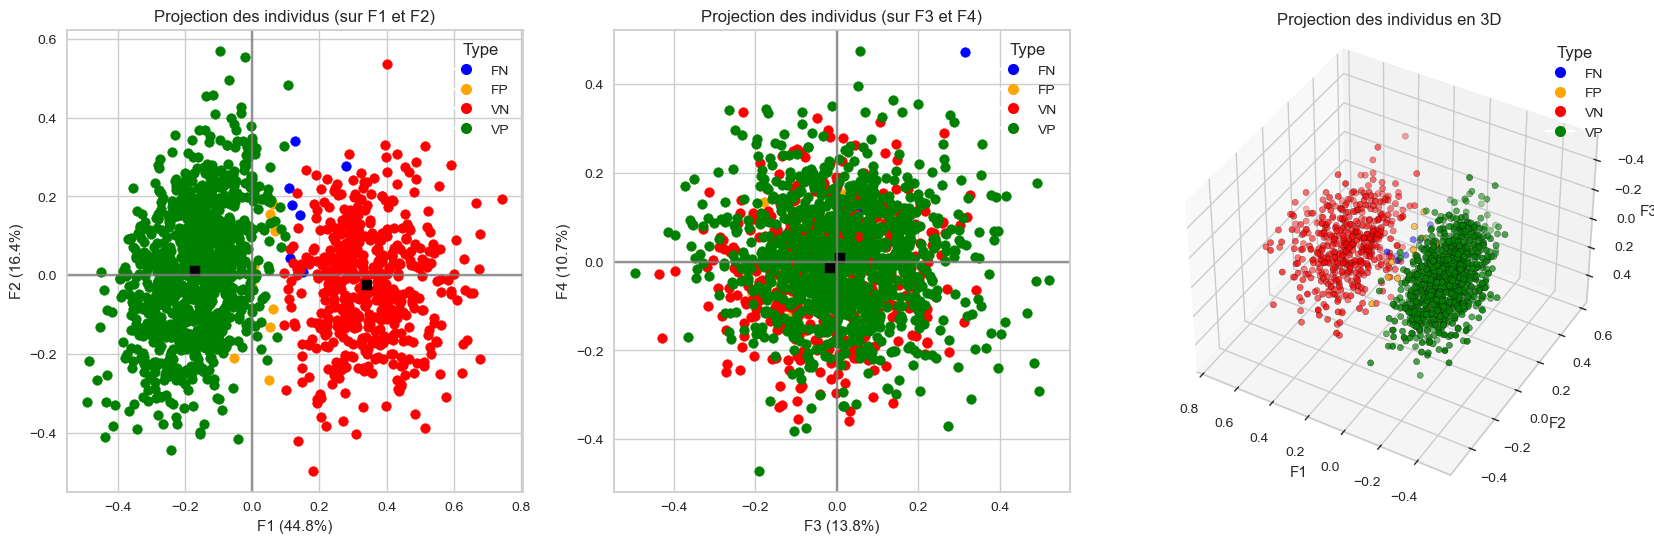

In [53]:
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133, projection="3d", elev=220, azim=60)

# Transform our DataFrame
X_ = np.array(data_ACP_proj)

# On enregistre nos axes x, y  / index 0 = F1 et index 1 = F2
x, y = axis = (0, 1)
# On enregistre nos axes x2, y2  / index 2 = F3 et index 3 = F4
x2, y2 = axis2 = (2, 3)

# Obtenir les types de labels
unique_labels = np.unique(data_ACP_proj['type'])

# Définir la couleur associée à chaque type de billet
label_colors = {"VP": 'green', "VN": 'red', "FP": 'orange', "FN": 'blue'}  # Customize the colors as desired

# 1er scatter - Iterate over unique labels and plot scatter points for each label with its color in the first subplot
for label in unique_labels:
    mask = data_ACP_proj['type'] == label
    scatter = ax1.scatter(X_[mask, 0], X_[mask, 1], c=label_colors[label], alpha=1, label=label)
# 1er scatter (centroides)
scatter_centroid = ax1.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1], marker="s", c="black")

# 2ème scatter - Iterate over unique labels and plot scatter points for each label with its color in the second subplot
for label in unique_labels:
    mask = data_ACP_proj['type'] == label
    scatter = ax2.scatter(X_[mask, 2], X_[mask, 3], c=label_colors[label], alpha=1, label=label)
# 2ème scatter (centroides)
scatter_centroid = ax2.scatter(centroids_proj.iloc[:, 2], centroids_proj.iloc[:, 3], marker="s", c="black")

# 3ème scatter
ax3.scatter(
    data_ACP_proj.iloc[:, 0],
    data_ACP_proj.iloc[:, 1],
    data_ACP_proj.iloc[:, 2],
    c=[label_colors[label] for label in data_ACP_proj['type']],
    edgecolor="k",
    s=20)

# nom des axes, avec le pourcentage d'inertie expliqué (variance expliquée)
ax1.set_xlabel('F{} ({}%)'.format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1)))
ax1.set_ylabel('F{} ({}%)'.format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1)))
ax2.set_xlabel('F{} ({}%)'.format(x2 + 1, round(100 * pca.explained_variance_ratio_[x2], 1)))
ax2.set_ylabel('F{} ({}%)'.format(y2 + 1, round(100 * pca.explained_variance_ratio_[y2], 1)))
ax3.set_xlabel("F1")
ax3.set_ylabel("F2")
ax3.set_zlabel("F3")

# affichage des lignes horizontales et verticales
ax1.axhline(0, color='grey', alpha=0.8)  # horizontal line at y=0
ax1.axvline(0, color='grey', alpha=0.8)  # vertical line at x=0
ax2.axhline(0, color='grey', alpha=0.8)  # horizontal line at y=0
ax2.axvline(0, color='grey', alpha=0.8)  # vertical line at x=0

# Ajout d'un titre
ax1.set_title("Projection des individus (sur F{} et F{})".format(x + 1, y + 1))
ax2.set_title("Projection des individus (sur F{} et F{})".format(x2 + 1, y2 + 1))
ax3.set_title("Projection des individus en 3D")

# Afficher la legende
legend_labels = unique_labels
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=label_colors[label], markersize=8)
                  for label in legend_labels]
# Add legend with custom handles and labels for the first subplot
ax1.legend(legend_handles, legend_labels, title="Type")
ax2.legend(legend_handles, legend_labels, title="Type")
ax3.legend(legend_handles, legend_labels, title="Type")
plt.show()

## Visualisation des individus en 3D

In [54]:
# Couleurs
label_colors = {"VP": 'green', "VN": 'red', "FP": 'orange', "FN": 'blue'}
# Créer une nouvelle colonne pour stocker les couleurs en fonction des couleurs
data_ACP_proj['color'] = data_ACP_proj['type'].map(label_colors)

fig = px.scatter_3d(data_ACP_proj, x=data_ACP_proj.iloc[:, 0], 
                    y=data_ACP_proj.iloc[:, 1], 
                    z=data_ACP_proj.iloc[:, 2], color='type',
                    color_discrete_map=label_colors,
                    # text=data_ACP_proj.index
                   )

# Légende
fig.update_layout(legend_title_text='Type')
fig.show()

On constate que les **<font color='blue'>Faux négatif</font>** et **<font color='orange'>Faux positif</font>** sont situés à la **"frontière"** des 2 clusters principaux, à savoir les **<font color='green'>Vrais </font>** et **<font color='red'>Faux </font>** billets.

## Plans factoriels

In [55]:
data_KM

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_KM,is_genuine,resultat_KM_type
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747,0,True,FN
1,0.213198,0.126437,0.394366,0.201531,0.439024,0.727273,1,True,VP
2,0.837563,0.770115,0.319249,0.362245,0.408537,0.741414,1,True,VP
3,0.162437,0.442529,0.525822,0.163265,0.451220,0.812121,1,True,VP
4,0.350254,0.655172,0.300469,0.270408,0.737805,0.616162,1,True,VP
...,...,...,...,...,...,...,...,...,...
1495,0.360406,0.712644,0.633803,0.367347,0.500000,0.361616,0,False,VN
1496,0.583756,0.856322,0.760563,0.584184,0.670732,0.298990,0,False,VN
1497,0.385787,0.500000,0.610329,0.645408,0.664634,0.496970,0,False,VN
1498,0.517766,0.655172,0.582160,0.558673,0.725610,0.557576,0,False,VN


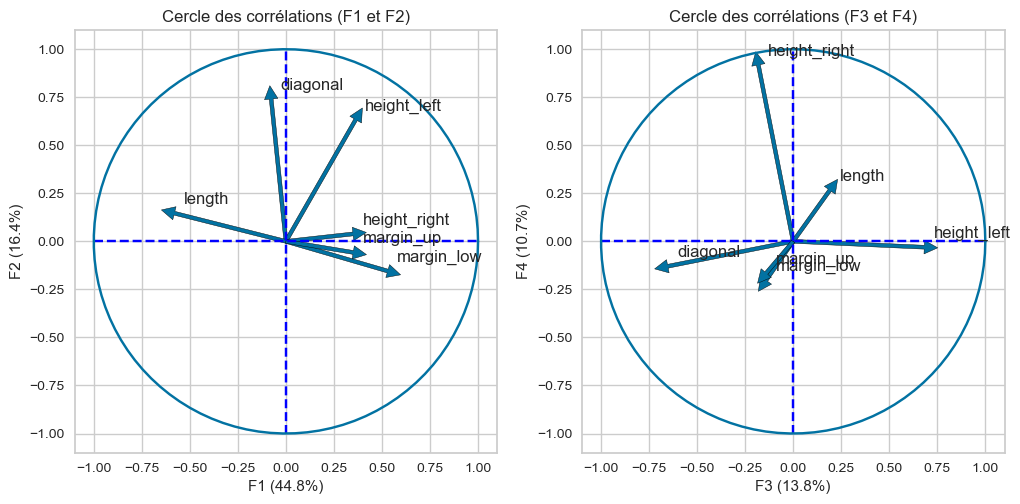

In [56]:
# On définit nos 2 axes x, y (Plan factoriel F1 / F2)
x1, y1 = 0, 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'aspect': 'equal'})

# 1er Plot
for i in range(0, pca.components_.shape[1]):
    ax1.arrow(0,
              0,
              pca.components_[x1, i],
              pca.components_[y1, i],
              head_width=0.07, head_length=0.07, width=0.02)
# ATTENTION : data_complet doit être sans la colonne "is_genuine"
    ax1.text(pca.components_[x1, i] + 0.05, pca.components_[y1, i] + 0.05, data_KM.columns[i])

ax1.plot([-1, 1], [0, 0], color='blue', ls='--')
ax1.plot([0, 0], [-1, 1], color='blue', ls='--')

ax1.set_xlabel('F{} ({}%)'.format(x1 + 1, round(100 * pca.explained_variance_ratio_[x1], 1)))
ax1.set_ylabel('F{} ({}%)'.format(y1 + 1, round(100 * pca.explained_variance_ratio_[y1], 1)))
ax1.set_title("Cercle des corrélations (F{} et F{})".format(x1 + 1, y1 + 1))

an = np.linspace(0, 2 * np.pi, 100)
ax1.plot(np.cos(an), np.sin(an))

# On définit nos 2 axes x, y (Plan factoriel F3 / F4)
x2, y2 = 2, 3

# 2ème Plot
for i in range(0, pca.components_.shape[1]):
    ax2.arrow(0,
              0,
              pca.components_[x2, i],
              pca.components_[y2, i],
              head_width=0.07, head_length=0.07, width=0.02)
# ATTENTION : data_complet doit être sans la colonne "is_genuine"
    ax2.text(pca.components_[x2, i] + 0.05, pca.components_[y2, i] + 0.05, data_KM.columns[i])

ax2.plot([-1, 1], [0, 0], color='blue', ls='--')
ax2.plot([0, 0], [-1, 1], color='blue', ls='--')

ax2.set_xlabel('F{} ({}%)'.format(x2 + 1, round(100 * pca.explained_variance_ratio_[x2], 1)))
ax2.set_ylabel('F{} ({}%)'.format(y2 + 1, round(100 * pca.explained_variance_ratio_[y2], 1)))
ax2.set_title("Cercle des corrélations (F{} et F{})".format(x2 + 1, y2 + 1))
ax2.plot(np.cos(an), np.sin(an))
plt.show()

Les 4 composantes qui expliquent 85% de l'information sont :
- length
- margin_low
- diagonal
- height_left

# Test sur un autre échantillon
## Import des données

In [57]:
# Test sur billets_prod
billets_prod = pd.read_csv("billets_production.csv")
billets_prod.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


# Modèle final

In [58]:
def Detecteur_faux_billets(billets_prod):
    scaled_data = scaler.fit_transform(billets_prod.drop(["id"], axis=1))
    X__ = pd.DataFrame(scaled_data, columns=["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"])
    predictions_svc = model_SVC.predict(X__)
    predictions_rlog = model_rlog.predict(X__)

    billets_prod_predict = billets_prod.drop(["id"], axis=1).copy()
    billets_prod_predict["is_genuine_svc"] = predictions_svc
    billets_prod_predict["is_genuine_rlog"] = predictions_rlog
    
    display(billets_prod_predict)

    faux_billet_svc = billets_prod_predict.loc[billets_prod_predict["is_genuine_svc"] == False, "is_genuine_svc"].value_counts()
    faux_billet_rlog = billets_prod_predict.loc[billets_prod_predict["is_genuine_rlog"] == False, "is_genuine_rlog"].value_counts()
    print("Le modèle de SVC donne {:.0f} faux billets, et le modèle de régression linéaire donne {:.0f} faux billets.".format(int(faux_billet_svc), int(faux_billet_rlog)))
    return

In [59]:
Detecteur_faux_billets(billets_prod)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_svc,is_genuine_rlog
0,171.76,104.01,103.54,5.21,3.30,111.42,False,False
1,171.87,104.17,104.13,6.00,3.31,112.09,False,False
2,172.00,104.58,104.29,4.99,3.39,111.57,False,False
3,172.49,104.55,104.34,4.44,3.03,113.20,True,True
4,171.65,103.63,103.56,3.77,3.16,113.33,True,True


Le modèle de SVC donne 3 faux billets, et le modèle de régression linéaire donne 3 faux billets.


# Conclusion - Comparaison des 3 méthodes de classification

Rappel :
- **Régression logistique** :
    - Score : 0.9892
    - Marge d'erreur: 1.08 %
    - 4 faux positif (FP)
- **SVC** :
    - Score : 0.9925
    - Marge d'erreur: 0.75 %
    - 2 faux positif (FP)    
    
- **K-means** :
    - Score: 0.9873
    - Marge d'erreur: 1.27 %
    - 12 faux positif (FP)
    - 7 faux négatif (FN)

*Compararaison des scores* :
- La performance de notre modèle de **SVC** est plus performant que celui obtenu par Régression Logistique. Cependant, la différence est vraiment minime, l'écart est de 2 faux positif. Autrement dit, le modèle de Support Vector Classifier est plus performant de 0.33%.
- La classification faite avec le K-means est en revanche non adaptée, cela est normal car le K-means un algorithme de classication non-supervisé.

*Performance des modèles* :
- Les Learning Curves respectives démontrent que la Régression logistique à besoin d'un échantillon de 250 billets, au-delà le modèle stagne.
- En revanche, bien que plus performant, le modèle de SVC à besoin de plus de 450 billets avant de commencer à stagner.

Le modèle de régression de **<font color='blue'>Support Machine Classifier (SVC)</font>** est à mon sens celui qu'il faut prendre en compte.

# [ALLER EN HAUT](#Descriptif-:)